In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1309,2024-05-27,108300,109400,107700,109000,638400
1310,2024-05-28,109900,109900,108500,109600,686800
1311,2024-05-29,109600,109700,107300,107900,816000
1312,2024-05-30,107000,108400,107000,107000,661900


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.8 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - loss: 0.6294 - val_loss: 0.0114
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1671 - val_loss: 0.0052
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1127 - val_loss: 0.0039
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0671 - val_loss: 0.0047
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0554 - val_loss: 0.0019
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0427 - val_loss: 0.0015
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0289 - val_loss: 0.0016
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0271 - val_loss: 0.0015
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0259 - val_loss: 0.0017
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0262 - val_loss: 0.0015
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0201 - val_loss: 0.0013
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 2332.4399483363272
MAPE: 1.401227849647246 %
MSLE: 0.0004734951021314299


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101
 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072
 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391
 0.125      0.14673913 0.16666667 0.17028986 0.16666667 0.16123188
 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.4293

7 day output [[0.20314948]]
8 day input [0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783
 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 

15 day output [[0.18820353]]
16 day input [0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623
 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087
 0.15217391 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797
 0.15942029 0.15217391 0.125      0.14673913 0.16666667 0.17028986
 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23733042 0.23191459

25 day output [[0.17148271]]
26 day input [0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783
 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478
 0.23913043 0.24094203 0.23733042 0.23191459 0.22254366 0.21660051
 0.21500245 0.21220881 0.20552287 0.20314948 0.20040876 0.1980917
 0.19467613 0.1924721

34 day output [[0.15648222]]
35 day input [0.17572464 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899
 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391
 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029
 0.15217391 0.125      0.14673913 0.16666667 0.17028986 0.16666667
 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638
 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449
 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464
 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623
 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.23733042
 0.23191459 0.22254366 0.21660051 0.21500245 0.21220881 0.20552287
 0.20314948 0.20040876 0.1980917  0.19467613 0.19247212 0.19176286
 0.19423079 0.18891641 0.18820353 0.18878703 0.19105852 0.18564707
 0.18278521 0.180011

42 day output [[0.1400533]]
43 day input [0.17934783 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188
 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391 0.125
 0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.23733042 0.23191459 0.22254366
 0.21660051 0.21500245 0.21220881 0.20552287 0.20314948 0.20040876
 0.1980917  0.19467613 0.19247212 0.19176286 0.19423079 0.18891641
 0.18820353 0.18878703 0.19105852 0.18564707 0.18278521 0.18001153
 0.17835334 0.17600623 0.17347161 0.171514   0.17148271 0.16829622
 0.16847557 0.16806871 0.1

50 day output [[0.12989362]]
51 day input [0.13405797 0.15942029 0.15217391 0.125      0.14673913 0.16666667
 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391
 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043
 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145 0.16304348
 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246
 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986
 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391
 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043
 0.24094203 0.23733042 0.23191459 0.22254366 0.21660051 0.21500245
 0.21220881 0.20552287 0.20314948 0.20040876 0.1980917  0.19467613
 0.19247212 0.19176286 0.19423079 0.18891641 0.18820353 0.18878703
 0.19105852 0.18564707 0.18278521 0.18001153 0.17835334 0.17600623
 0.17347161 0.171514   0.17148271 0.16829622 0.16847557 0.16806871
 0.16606623 0.16321418 0.16298248 0.16146407 0.16042447 0.15648222
 0.15312733 0.150058

59 day output [[0.1143192]]
60 day input [0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623
 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232
 0.28623188 0.25543478 0.23913043 0.24094203 0.23733042 0.23191459
 0.22254366 0.21660051 0.21500245 0.21220881 0.20552287 0.20314948
 0.20040876 0.1980917  0.19467613 0.19247212 0.19176286 0.19423079
 0.18891641 0.18820353 0.18878703 0.19105852 0.18564707 0.18278521
 0.18001153 0.17835334 0.17600623 0.17347161 0.171514   0.17148271
 0.16829622 0.16847557 0.16806871 0.16606623 0.16321418 0.16298248
 0.16146407 0.16042447 0.15648222 0.15312733 0.15005808 0.15072547
 0.14839105 0.14505622 0.14595757 0.14284174 0.1400533  0.14070861
 0.13930884 0.13749851

67 day output [[0.1041439]]
68 day input [0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478
 0.23913043 0.24094203 0.23733042 0.23191459 0.22254366 0.21660051
 0.21500245 0.21220881 0.20552287 0.20314948 0.20040876 0.1980917
 0.19467613 0.19247212 0.19176286 0.19423079 0.18891641 0.18820353
 0.18878703 0.19105852 0.18564707 0.18278521 0.18001153 0.17835334
 0.17600623 0.17347161 0.171514   0.17148271 0.16829622 0.16847557
 0.16806871 0.16606623 0.16321418 0.16298248 0.16146407 0.16042447
 0.15648222 0.15312733 0.15005808 0.15072547 0.14839105 0.14505622
 0.14595757 0.14284174 0.1400533  0.14070861 0.13930884 0.13749851
 0.13654172 0.1346848  0.13288283 0.13068193 0.12989362 0.1282917
 0.12742558 0.12673919 

76 day output [[0.0866583]]
77 day input [0.18478261 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623
 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.23733042
 0.23191459 0.22254366 0.21660051 0.21500245 0.21220881 0.20552287
 0.20314948 0.20040876 0.1980917  0.19467613 0.19247212 0.19176286
 0.19423079 0.18891641 0.18820353 0.18878703 0.19105852 0.18564707
 0.18278521 0.18001153 0.17835334 0.17600623 0.17347161 0.171514
 0.17148271 0.16829622 0.16847557 0.16806871 0.16606623 0.16321418
 0.16298248 0.16146407 0.16042447 0.15648222 0.15312733 0.15005808
 0.15072547 0.14839105 0.14505622 0.14595757 0.14284174 0.1400533
 0.14070861 0.13930884 0.13749851 0.13654172 0.1346848  0.13288283
 0.13068193 0.12989362 0.1282917  0.12742558 0.12673919 0.12276669
 0.12128489 0.11898622 0.11678207 0.11554132 0.1143192  0.11320997
 0.11311263 0.11110532 0

86 day output [[0.06249614]]
87 day input [0.42572464 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391
 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043
 0.24094203 0.23733042 0.23191459 0.22254366 0.21660051 0.21500245
 0.21220881 0.20552287 0.20314948 0.20040876 0.1980917  0.19467613
 0.19247212 0.19176286 0.19423079 0.18891641 0.18820353 0.18878703
 0.19105852 0.18564707 0.18278521 0.18001153 0.17835334 0.17600623
 0.17347161 0.171514   0.17148271 0.16829622 0.16847557 0.16806871
 0.16606623 0.16321418 0.16298248 0.16146407 0.16042447 0.15648222
 0.15312733 0.15005808 0.15072547 0.14839105 0.14505622 0.14595757
 0.14284174 0.1400533  0.14070861 0.13930884 0.13749851 0.13654172
 0.1346848  0.13288283 0.13068193 0.12989362 0.1282917  0.12742558
 0.12673919 0.12276669 0.12128489 0.11898622 0.11678207 0.11554132
 0.1143192  0.11320997 0.11311263 0.11110532 0.10960077 0.10653478
 0.10657544 0.1044187  0.1041439  0.10196923 0.09863082 0.09581551
 0.09446561 0.093628

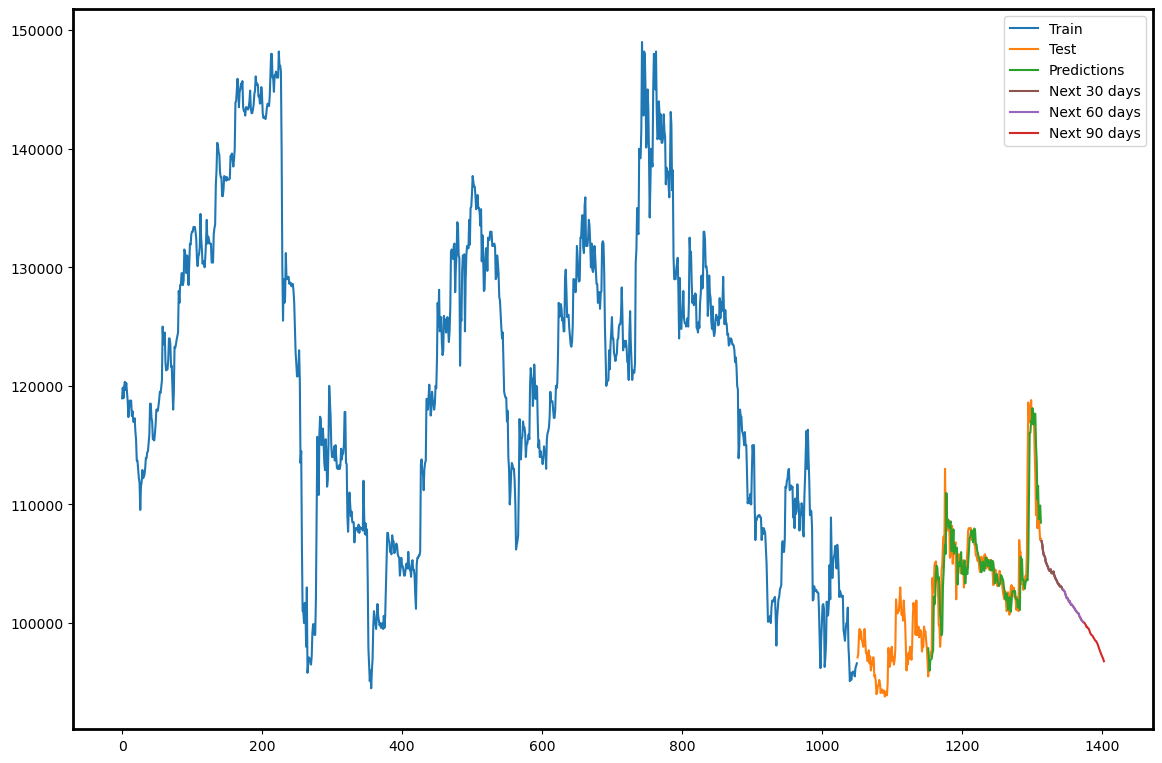

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_VJC_82.png")
plt.show()